## Importing required Libraries

In [74]:
import math
import numpy as np 
from PIL import Image  
from matplotlib import pyplot as plt 

# **LZW Encoding function**

In [75]:
# encoding function
def initDictEncoder(x):
    dic = {}
    i = 0 
    while(i < x):
        dic[str(i)] = str(i)
        i+=1 
    return dic

def Encoder(image): 
    compressionIndex = 256
    pixelarray = []
    height, width = image.shape
    
    r, c = 0, 0 
    while(r < height):
        c = 0
        while(c < width):
            pixelarray.append(str(image[r][c]))
            c += 1
        r += 1

    compressionDict = initDictEncoder(256)
    
    crs = pixelarray[0] # currently recognized sequence
    compressedCode = []

    i, n = 1, len(pixelarray)
    while(i < n):
        if crs + '-' + pixelarray[i] in compressionDict:
            crs = crs + '-' + pixelarray[i]
        else:
            compressedCode.append(compressionDict[crs])
            compressionDict[crs + '-' + pixelarray[i]] = str(compressionIndex)
            crs = pixelarray[i]
            compressionIndex += 1
        i += 1

    compressedCode.append(compressionDict[crs])
    return compressedCode

# **LZW Decoding function**

In [76]:
def initDictDecoder(x):
    dic = {}
    i = 0 
    while(i < x):
        dic[str(i)] = str(i)
        i += 1 
    return dic

def Decoder(compressedImage):
    decompressionDict = initDictDecoder(256)
    
    decodedImage = [compressedImage[0]]
    decompressionIndex = 256

    last = compressedImage[0]
    value = decompressionDict[last]
    status = value[:]

    i, n = 1, len(compressedImage)
    while(i < n):
        if compressedImage[i] not in decompressionDict: 
            value = decompressionDict[last] + '-' + status 
        else: 
            value = decompressionDict[compressedImage[i]]

        decodedImage.append(value)
        if '-' in value:
            status = value[0:value.index('-') + 1]
        else:
            status = value[:]

        decompressionDict[str(decompressionIndex)] = decompressionDict[last] + '-' + status
        last = compressedImage[i]
        decompressionIndex = decompressionIndex + 1

        i += 1
    return decodedImage


# **Global Variables**

In [77]:
X1 = 0 # Compression Ratio for Fig1.tif
X2 = 0 # Compression Ratio for Fig2.tif
X3 = 0 # Compression Ratio for Fig3.tif

Y1 = 0 # Redundancy for Fig1.tif
Y2 = 0 # Redundancy for Fig2.tif
Y3 = 0 # Redundancy for Fig3.tif
'''
The compression ratio is calculated using the formula = n1/n2, where n1 represents the size of the data before compression and n2 represents the size of the data after compression.
The relative redundancy is then determined using the formula 1 - 1/C, where C is the compression ratio.
'''

RMS1 = 0 # RMS error for Fig1.tif
RMS2 = 0 # RMS error for Fig2.tif
RMS3 = 0 # RMS error for Fig3.tif

# **RMS error function**

In [78]:
def rms(original, decoded):
    numerator = 0
    height, width = original.size
    
    row, col = 0, 0 
    while(row < height):
        col = 0
        while(col < width):
            temp = original.getpixel((row,col)) - decoded.getpixel((row,col))
            numerator += (temp * temp)
            col += 1
        row += 1
    return pow(numerator / (height*width), 0.5)

# **Task1: Encoding images**

In [79]:
# Encoding Fig1.tif
image1 = Image.open('Fig1.tif')
image1 = image1.convert('L')
npImage1 = np.array(image1)
height1, width1 = npImage1.shape

# Encoding the input image
encodedImage1 = Encoder(npImage1)

# Saving the encoded image in .lzw file
file = open("Fig1_lzw.lzw", "w")
for output in encodedImage1:
        file.write(output + " ")
file.close()

In [80]:
# Encoding Fig2.tif
image2 = Image.open('Fig2.tif')
image2 = image2.convert('L')
npImage2 = np.array(image2)
height2, width2 = npImage2.shape

# Encoding the input image
encodedImage2 = Encoder(npImage2)

# Saving the encoded image in .lzw file
file = open("Fig2_lzw.lzw", "w")
for output in encodedImage2:
        file.write(output + " ")
file.close()

In [81]:
# Encoding Fig3.tif
image3 = Image.open('Fig3.tif')
image3 = image3.convert('L')
npImage3 = np.array(image3)
height3, width3 = npImage3.shape

# Encoding the input image
encodedImage3 = Encoder(npImage3)

# Saving the encoded image in .lzw file
file = open("Fig3_lzw.lzw", "w")
for output in encodedImage3:
        file.write(output + " ")
file.close()

# **Task2: Decoding images**

In [82]:
# Decoding the encoded image (Fig1.tif)
decodedImage1 = Decoder(encodedImage1)

# Cleaning the decoded output
cleanedImage1 = []
for i in decodedImage1:
    y = i.split('-')
    j, sz = 0, len(y)
    while(j < sz):
        if y[j].isnumeric():
            cleanedImage1.append(int(y[j]))
        j += 1 

# Generating back the decompressed image from the decoded sequence
decompressedImage1 = Image.new('L',(height1, width1))
i, n = 0, len(cleanedImage1)
while(i < n):
    y = int(cleanedImage1[i])
    decompressedImage1.putpixel((i%height1, i//height1), y)
    i += 1
decompressedImage1.save("Fig11.tiff")
# --------  #

In [83]:
# Decoding the encoded image (Fig2.tif)
decodedImage2 = Decoder(encodedImage2)

# Cleaning the decoded output
cleanedImage2 = []
for i in decodedImage2:
    y = i.split('-')
    j, sz = 0, len(y)
    while(j < sz):
        if y[j].isnumeric():
            cleanedImage2.append(int(y[j]))
        j += 1 

# Generating back the decompressed image from the decoded sequence
decompressedImage2 = Image.new('L',(height2, width2))
i, n = 0, len(cleanedImage2)
while(i < n):
    y = int(cleanedImage2[i])
    decompressedImage2.putpixel((i%height2, i//height2), y)
    i += 1
decompressedImage2.save("Fig22.tiff")
# --------  #

In [84]:
# Decoding the encoded image (Fig3.tif)
decodedImage3 = Decoder(encodedImage3)

# Cleaning the decoded output
cleanedImage3 = []
for i in decodedImage3:
    y = i.split('-')
    j, sz = 0, len(y)
    while(j < sz):
        if y[j].isnumeric():
            cleanedImage3.append(int(y[j]))
        j += 1 

# Generating back the decompressed image from the decoded sequence
decompressedImage3 = Image.new('L',(height3, width3))
i, n = 0, len(cleanedImage3)
while(i < n):
    y = int(cleanedImage3[i])
    decompressedImage3.putpixel((i%height3, i//height3), y)
    i += 1
decompressedImage3.save("Fig33.tiff")
# --------  #

# **Task3: Redundancies and Compression Factors**

In [85]:
n1 = height1 * width1
n2 = len(encodedImage1)
# Calculating Compression Ratio
X1 = n1/n2
# Calculating Redundancy
Y1 = 1 - 1/X1
print("Fig1: Compression Ratio – ", X1, " Redundancy –", Y1)

Fig1: Compression Ratio –  24.665412118931126  Redundancy – 0.9594573974609375


In [86]:
n1 = height2 * width2
n2 = len(encodedImage2)
# Calculating Compression Ratio
X2 = n1/n2
# Calculating Redundancy
Y2 = 1 - 1/X2
print("Fig2: Compression Ratio – ", X2, " Redundancy –", Y2)

Fig2: Compression Ratio –  11.130434782608695  Redundancy – 0.91015625


In [87]:
n1 = height3 * width3
n2 = len(encodedImage3)
# Calculating Compression Ratio
X3 = n1/n2
# Calculating Redundancy
Y3 = 1 - 1/X3
print("Fig3: Compression Ratio – ", X3, " Redundancy –", Y3)

Fig3: Compression Ratio –  7.0385565460208355  Redundancy – 0.8579254150390625


# **Task4: Efficiency of the above algorithm wrt to the content of the images**

Figure 1 achieves the highest compression ratio, followed by figure 2, and then figure 3, as indicated in the data above. The following is how the results can be explained:

The LZW compression algorithm takes advantage of the substantial spatial redundancy of the pictures. As a result, images with a lot of spatial redundancy will compress the most.

If we look closely at image1, we can see that it has the most spatial redundancy. When we look at the star in the image, we can see that there is redundancy in both the horizontal and vertical axes. Even in diagonal directions, redundancy exists. 

There is a lot of redundancy in the horizontal direction in image2. However, in the vertical direction, there is a significant difference. As a result, its compression is lower than image1.

In the case of image3, the image may appear to have a lot of redundancy to the naked eye. Because the human eye averages the influence of surrounding intensities, this is the case. However, a closer examination reveals that this image has a significant amount of noise, resulting in low spatial redundancy and, as a result, a low compression ratio.

# **Task5: Part A: Calculating RMS Error for each of the images**

In [88]:
RMS1 = rms(image1, decompressedImage1)
print("RMS Error for Fig1: ", RMS1)

RMS Error for Fig1:  0.0


In [89]:
RMS2 = rms(image2, decompressedImage2)
print("RMS Error for Fig2: ", RMS2)

RMS Error for Fig2:  0.0


In [90]:
RMS3 = rms(image3, decompressedImage3)
print("RMS Error for Fig3: ", RMS3)

RMS Error for Fig3:  0.0


# **Task5: Part B: Displaying the original, decompressed and difference image**

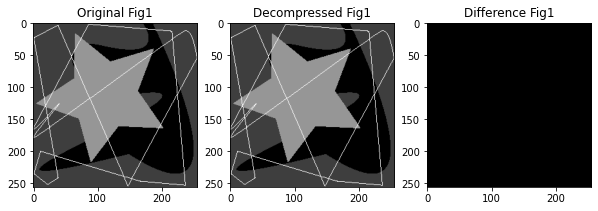

In [91]:
# Fig 1
diffImage1 = Image.new('L',(height1, width1))
i, j = 0, 0 
while(i < height1):
    j = 0
    while(j < width1):
        diffImage1.putpixel((i,j), (decompressedImage1.getpixel((i,j)) - image1.getpixel((i,j))))
        j += 1
    i += 1

plt.figure(figsize = (10, 10))
plt.subplot(1, 3, 1)
plt.title("Original Fig1")
plt.imshow(npImage1, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title("Decompressed Fig1")
plt.imshow(decompressedImage1,cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title("Difference Fig1")
plt.imshow(diffImage1, cmap = 'gray')

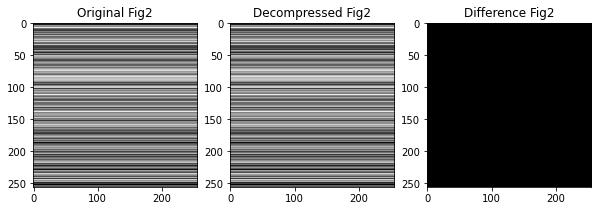

In [92]:
# Fig 2
diffImage2 = Image.new('L',(height2, width2))
i, j = 0, 0 
while(i < height2):
    j = 0
    while(j < width2):
        diffImage2.putpixel((i,j), (decompressedImage2.getpixel((i,j)) - image2.getpixel((i,j))))
        j += 1
    i += 1

plt.figure(figsize = (10, 10))
plt.subplot(1, 3, 1)
plt.title("Original Fig2")
plt.imshow(npImage2, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title("Decompressed Fig2")
plt.imshow(decompressedImage2,cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title("Difference Fig2")
plt.imshow(diffImage2, cmap = 'gray')

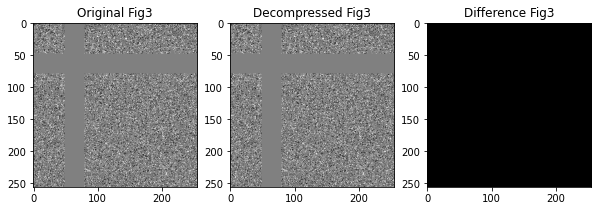

In [93]:
# Fig 3
diffImage3 = Image.new('L',(height3, width3))
i, j = 0, 0 
while(i < height3):
    j = 0
    while(j < width3):
        diffImage3.putpixel((i,j), (decompressedImage3.getpixel((i,j)) - image3.getpixel((i,j))))
        j += 1
    i += 1

plt.figure(figsize = (10, 10))
plt.subplot(1, 3, 1)
plt.title("Original Fig3")
plt.imshow(npImage3, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title("Decompressed Fig3")
plt.imshow(decompressedImage3, cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title("Difference Fig3")
plt.imshow(diffImage3, cmap = 'gray')